# 😀 **Predicting Student Depression from Lifestyle and Academic Stressors: A Machine Learning Approach** 😞

## **1. Dataset Selection** 📑
The dataset includes information about people's mental health, lifestyle, and habits, like age, work stress, sleep, and depression. Classification can predict if someone is depressed based on their lifestyle and stress levels.


## **2. Define the Case Study** 🔍
In this case study, clustering will group people with similar mental health patterns, like high stress and poor sleep. Classification will predict if someone is depressed (Yes/No) using data like work pressure and family history. This helps identify people at risk of depression and offer support.


## **3. Data Preprocessing** 💻

## **3.1 Import and read dataset**

In [1]:
!pip install opendatasets --upgrade --quiet

In [2]:
import pandas as pd
import os
import opendatasets as od
import numpy as np

dataset = 'https://www.kaggle.com/datasets/hopesb/student-depression-dataset?select=Student+Depression+Dataset.csv'

od.download(dataset)

Please provide your Kaggle credentials to download this dataset. Learn more: http://bit.ly/kaggle-creds
Your Kaggle username: 00
Your Kaggle Key: ··········
Dataset URL: https://www.kaggle.com/datasets/hopesb/student-depression-dataset


100%|██████████| 454k/454k [00:00<00:00, 260MB/s]

In [3]:
df = pd.read_csv('/content/student-depression-dataset/Student Depression Dataset.csv')
df.head()

,id,Gender,Age,City,Profession,Academic Pressure,Work Pressure,CGPA,Study Satisfaction,Job Satisfaction,Sleep Duration,Dietary Habits,Degree,Have you ever had suicidal thoughts ?,Work/Study Hours,Financial Stress,Family History of Mental Illness,Depression
0,2,Male,33.0,Visakhapatnam,Student,5.0,0.0,8.97,2.0,0.0,5-6 hours,Healthy,B.Pharm,Yes,3.0,1.0,No,1
1,8,Female,24.0,Bangalore,Student,2.0,0.0,5.90,5.0,0.0,5-6 hours,Moderate,BSc,No,3.0,2.0,Yes,0
2,26,Male,31.0,Srinagar,Student,3.0,0.0,7.03,5.0,0.0,Less than 5 hours,Healthy,BA,No,9.0,1.0,Yes,0
3,30,Female,28.0,Varanasi,Student,3.0,0.0,5.59,2.0,0.0,7-8 hours,Moderate,BCA,Yes,4.0,5.0,Yes,1
4,32,Female,25.0,Jaipur,Student,4.0,0.0,8.13,3.0,0.0,5-6 hours,Moderate,M.Tech,Yes,1.0,1.0,No,0


In [4]:
# Filter the dataset for "Student" profession
df = df[df['Profession'] == 'Student'].reset_index(drop=True)


In [5]:
# Drop unnecessary columns
df = df.drop(columns=['Work Pressure', 'Job Satisfaction', 'Profession'])


In [6]:
df

,id,Gender,Age,City,Academic Pressure,CGPA,Study Satisfaction,Sleep Duration,Dietary Habits,Degree,Have you ever had suicidal thoughts ?,Work/Study Hours,Financial Stress,Family History of Mental Illness,Depression
0,2,Male,33.0,Visakhapatnam,5.0,8.97,2.0,5-6 hours,Healthy,B.Pharm,Yes,3.0,1.0,No,1
1,8,Female,24.0,Bangalore,2.0,5.90,5.0,5-6 hours,Moderate,BSc,No,3.0,2.0,Yes,0
2,26,Male,31.0,Srinagar,3.0,7.03,5.0,Less than 5 hours,Healthy,BA,No,9.0,1.0,Yes,0
3,30,Female,28.0,Varanasi,3.0,5.59,2.0,7-8 hours,Moderate,BCA,Yes,4.0,5.0,Yes,1
4,32,Female,25.0,Jaipur,4.0,8.13,3.0,5-6 hours,Moderate,M.Tech,Yes,1.0,1.0,No,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
27865,140685,Female,27.0,Surat,5.0,5.75,5.0,5-6 hours,Unhealthy,Class 12,Yes,7.0,1.0,Yes,0
27866,140686,Male,27.0,Ludhiana,2.0,9.40,3.0,Less than 5 hours,Healthy,MSc,No,0.0,3.0,Yes,0
27867,140689,Male,31.0,Faridabad,3.0,6.61,4.0,5-6 hours,Unhealthy,MD,No,12.0,2.0,No,0
27868,140690,Female,18.0,Ludhiana,5.0,6.88,2.0,Less than 5 hours,Healthy,Class 12,Yes,10.0,5.0,No,1


## **3.2 Check for missing values**

In [7]:
# Check for missing values
missing_values = df.isnull().sum()
print("Missing Values:\n", missing_values)

# Fill missing numerical columns with the median
numeric_columns = df.select_dtypes(include=[np.number]).columns
df[numeric_columns] = df[numeric_columns].fillna(df[numeric_columns].median())

# Fill missing categorical columns with the mode
categorical_columns = df.select_dtypes(include=['object']).columns
for column in categorical_columns:
    df.fillna({column: df[column].mode()[0]}, inplace=True)
    df[column] = df[column].fillna(df[column].mode()[0])

# Check for remaining missing values
missing_values = df.isnull().sum()
print(missing_values)


Missing Values:
 id                                       0
Gender                                   0
Age                                      0
City                                     0
Academic Pressure                        0
CGPA                                     0
Study Satisfaction                       0
Sleep Duration                           0
Dietary Habits                           0
Degree                                   0
Have you ever had suicidal thoughts ?    0
Work/Study Hours                         0
Financial Stress                         3
Family History of Mental Illness         0
Depression                               0
dtype: int64
id                                       0
Gender                                   0
Age                                      0
City                                     0
Academic Pressure                        0
CGPA                                     0
Study Satisfaction                       0
Sleep Duration          

## **3.3 Check for Duplicates**

In [8]:
# Get the original size of the dataset
original_size = len(df)

# Remove duplicates
df.drop_duplicates(inplace=True)
duplicates_removed = original_size - len(df)

# Display the results
print(f"Original dataset size: {original_size}")
print(f"Number of duplicates removed: {duplicates_removed}")
print(f"Processed dataset size: {len(df)}")

Original dataset size: 27870
Number of duplicates removed: 0
Processed dataset size: 27870


## **3.4 Encoding of categorical variables**

In [9]:
from sklearn.preprocessing import LabelEncoder

# Convert categorical columns to numeric using Label Encoding
label_encoder = LabelEncoder()

# Example categorical columns to encode
categorical_columns = ['Gender', 'Dietary Habits', 'Have you ever had suicidal thoughts ?', 'Family History of Mental Illness', 'Degree', 'Sleep Duration']

for column in categorical_columns:
    df[column] = label_encoder.fit_transform(df[column])


df.head()


,id,Gender,Age,City,Academic Pressure,CGPA,Study Satisfaction,Sleep Duration,Dietary Habits,Degree,Have you ever had suicidal thoughts ?,Work/Study Hours,Financial Stress,Family History of Mental Illness,Depression
0,2,1,33.0,Visakhapatnam,5.0,8.97,2.0,0,0,3,1,3.0,1.0,0,1
1,8,0,24.0,Bangalore,2.0,5.90,5.0,0,1,10,0,3.0,2.0,1,0
2,26,1,31.0,Srinagar,3.0,7.03,5.0,2,0,5,0,9.0,1.0,1,0
3,30,0,28.0,Varanasi,3.0,5.59,2.0,1,1,7,1,4.0,5.0,1,1
4,32,0,25.0,Jaipur,4.0,8.13,3.0,0,1,17,1,1.0,1.0,0,0


# **4. Exploratory Data Analysis (EDA)** 📈

## **4.1 Distribution Analysis**

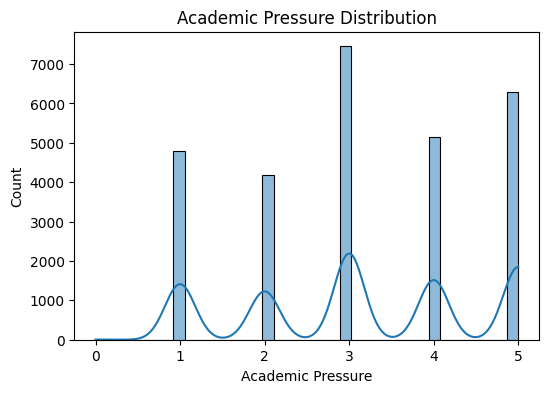

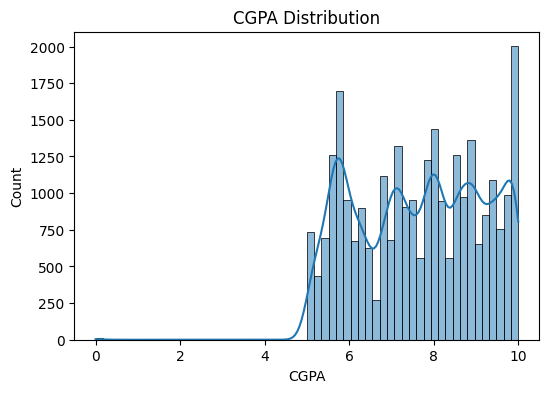

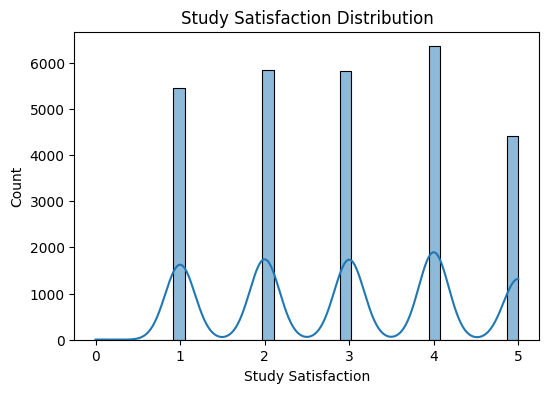

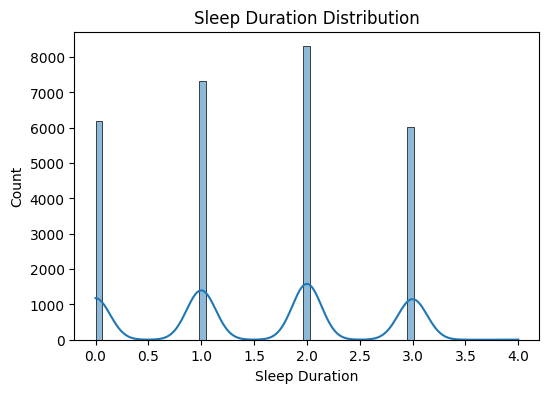

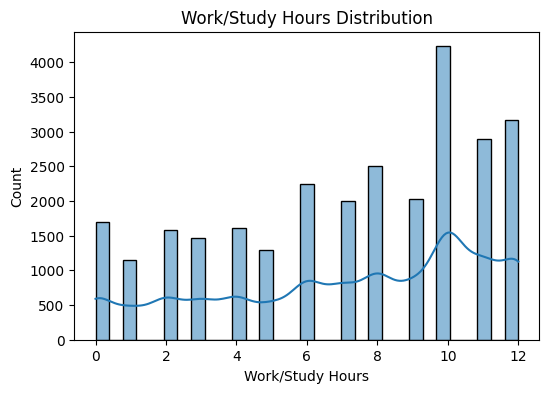

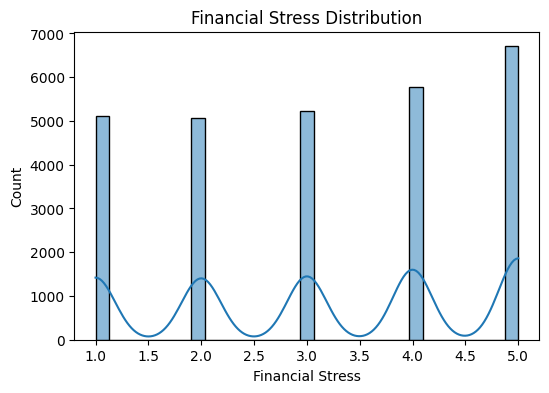

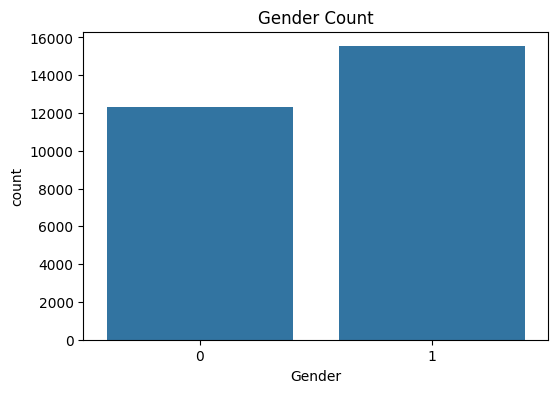

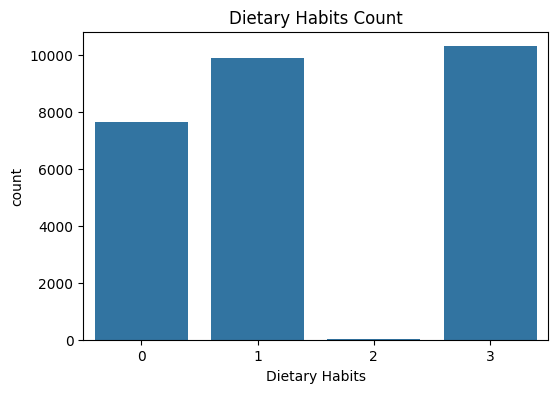

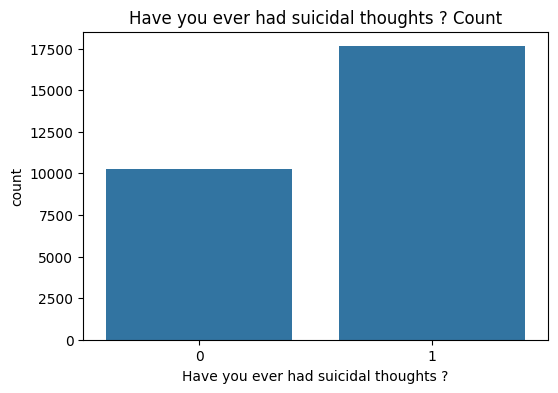

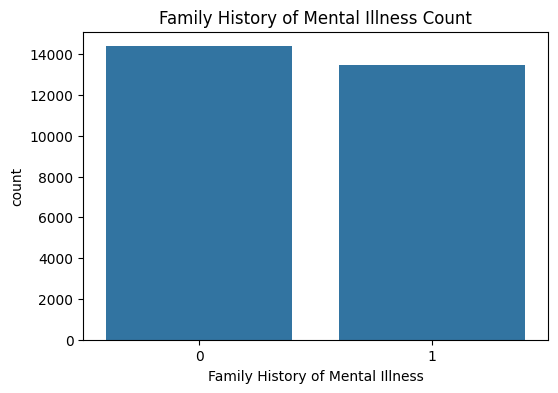

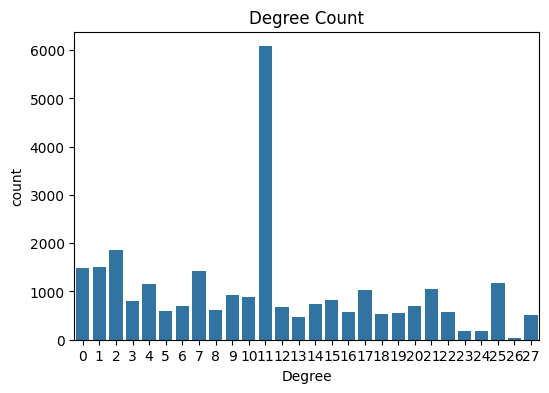

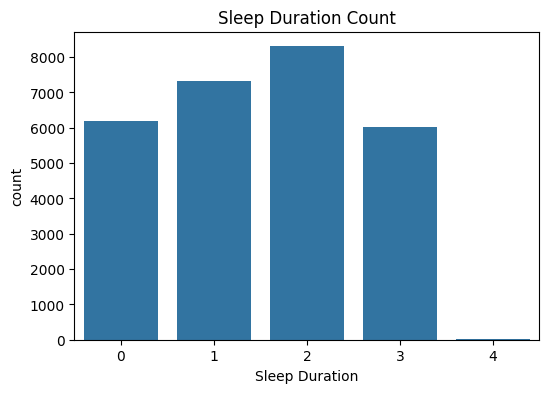

In [10]:
import seaborn as sns
import matplotlib.pyplot as plt

# Visualize distributions of numerical features
numerical_features = ['Academic Pressure', 'CGPA', 'Study Satisfaction', 'Sleep Duration', 'Work/Study Hours', 'Financial Stress']

for feature in numerical_features:
    plt.figure(figsize=(6, 4))
    sns.histplot(df[feature], kde=True)
    plt.title(f'{feature} Distribution')
    plt.show()

# Visualize the distribution of categorical features
categorical_features = ['Gender', 'Dietary Habits', 'Have you ever had suicidal thoughts ?', 'Family History of Mental Illness', 'Degree', 'Sleep Duration']

for feature in categorical_features:
    plt.figure(figsize=(6, 4))
    sns.countplot(x=df[feature])
    plt.title(f'{feature} Count')
    plt.show()


## **4.2 Correlation Matrix**

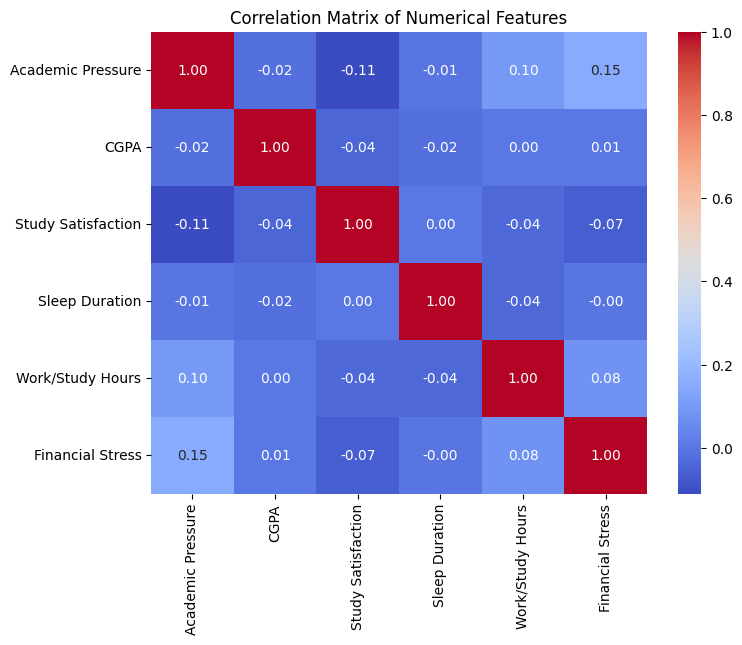

In [12]:
# Check correlation between numerical features
corr_matrix = df[numerical_features].corr()
plt.figure(figsize=(8, 6))
sns.heatmap(corr_matrix, annot=True, cmap='coolwarm', fmt='.2f')
plt.title('Correlation Matrix of Numerical Features')
plt.show()


1. Academic Pressure and Financial Stress:

Positive correlation (0.15): Higher academic pressure is associated with increased financial stress.

2. Study Satisfaction:

Negative correlation with Academic Pressure (-0.11): As academic pressure increases, study satisfaction decreases.

Negative correlation with Financial Stress (-0.07): Higher financial stress correlates with lower study satisfaction.

In [13]:
# Filter numeric columns
numeric_cols = df.select_dtypes(include=[np.number])

# Define a function to remove outliers using the IQR method
def remove_outliers(df, col):
    Q1 = df[col].quantile(0.25)
    Q3 = df[col].quantile(0.75)
    IQR = Q3 - Q1
    lower_bound = Q1 - 1.5 * IQR
    upper_bound = Q3 + 1.5 * IQR
    # Filter out the outliers
    filtered_df = df[(df[col] >= lower_bound) & (df[col] <= upper_bound)]
    return filtered_df

# Apply outlier removal for each numeric column
df_cleaned = df.copy()
for col in numeric_cols.columns:
    original_len = len(df_cleaned)
    df_cleaned = remove_outliers(df_cleaned, col)
    cleaned_len = len(df_cleaned)
    print(f"Column '{col}': {original_len - cleaned_len} outliers removed.")

# Output the size of the dataset after cleaning
print(f"\nTotal number of rows after cleaning: {len(df_cleaned)}")

Column 'id': 0 outliers removed.
Column 'Gender': 0 outliers removed.
Column 'Age': 12 outliers removed.
Column 'Academic Pressure': 0 outliers removed.
Column 'CGPA': 9 outliers removed.
Column 'Study Satisfaction': 0 outliers removed.
Column 'Sleep Duration': 18 outliers removed.
Column 'Dietary Habits': 0 outliers removed.
Column 'Degree': 0 outliers removed.
Column 'Have you ever had suicidal thoughts ?': 0 outliers removed.
Column 'Work/Study Hours': 0 outliers removed.
Column 'Financial Stress': 0 outliers removed.
Column 'Family History of Mental Illness': 0 outliers removed.
Column 'Depression': 0 outliers removed.

Total number of rows after cleaning: 27831


# **5.Classiﬁcation**

Random Forest Classification Report:
              precision    recall  f1-score   support

           0       0.75      0.70      0.73      3518
           1       0.79      0.83      0.81      4843

    accuracy                           0.78      8361
   macro avg       0.77      0.77      0.77      8361
weighted avg       0.77      0.78      0.77      8361

Random Forest Confusion Matrix:
[[2476 1042]
 [ 831 4012]]
Random Forest Accuracy: 0.7760

Logistic Regression Classification Report:
              precision    recall  f1-score   support

           0       0.78      0.72      0.75      3518
           1       0.81      0.86      0.83      4843

    accuracy                           0.80      8361
   macro avg       0.80      0.79      0.79      8361
weighted avg       0.80      0.80      0.80      8361

Logistic Regression Confusion Matrix:
[[2546  972]
 [ 702 4141]]
Logistic Regression Accuracy: 0.7998

SVM Classification Report:
              precision    recall  f1-score  

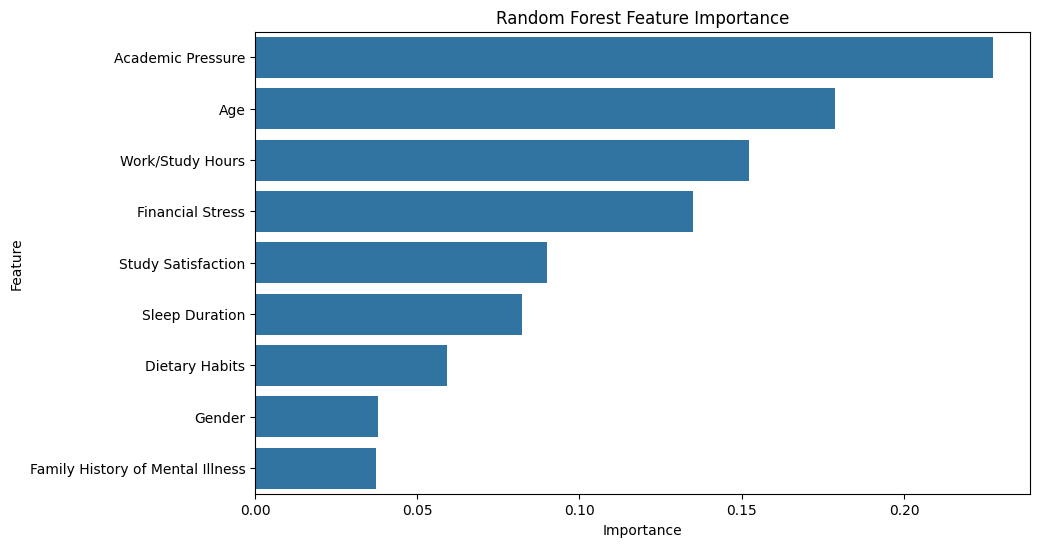

In [14]:
from sklearn.model_selection import train_test_split
from sklearn.ensemble import RandomForestClassifier
from sklearn.linear_model import LogisticRegression
from sklearn.svm import SVC
from sklearn.tree import DecisionTreeClassifier
from sklearn.neighbors import KNeighborsClassifier
from sklearn.metrics import classification_report, confusion_matrix, accuracy_score
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt

# Feature Selection and Target Variable
X = df[['Gender', 'Age', 'Academic Pressure', 'Study Satisfaction',
         'Sleep Duration', 'Financial Stress', 'Work/Study Hours',
         'Dietary Habits', 'Family History of Mental Illness']]

# Ensure categorical variables like 'Gender' and 'Dietary Habits' are encoded
X = pd.get_dummies(X, drop_first=True)

# Target Variable: Depression
y = df['Depression']

# Split the data into training and testing sets
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.3, random_state=42)

# Initialize models
models = {
    'Random Forest': RandomForestClassifier(random_state=42),
    'Logistic Regression': LogisticRegression(random_state=42, max_iter=1000),
    'SVM': SVC(random_state=42),
    'Decision Tree': DecisionTreeClassifier(random_state=42),
    'KNN': KNeighborsClassifier()
}

# Train and evaluate each model
for model_name, model in models.items():
    model.fit(X_train, y_train)
    y_pred = model.predict(X_test)

    print(f"{model_name} Classification Report:")
    print(classification_report(y_test, y_pred))
    print(f"{model_name} Confusion Matrix:")
    print(confusion_matrix(y_test, y_pred))
    print(f"{model_name} Accuracy: {accuracy_score(y_test, y_pred):.4f}\n")

# Visualize feature importance using Random Forest only
rf_model = models['Random Forest']
feature_importance = rf_model.feature_importances_
features = X.columns

# Create a DataFrame to visualize the importance
importance_df = pd.DataFrame({'Feature': features, 'Importance': feature_importance})
importance_df = importance_df.sort_values(by='Importance', ascending=False)

# Plot feature importance
plt.figure(figsize=(10, 6))
sns.barplot(x='Importance', y='Feature', data=importance_df)
plt.title('Random Forest Feature Importance')
plt.show()

Model Performance:

Logistic Regression: Highest accuracy at 79.98%, effective at correctly classifying depressed individuals with a high recall of 0.86.

SVM: Slightly lower accuracy at 79.91%, with a balanced F1-score of 0.83 for detecting depression, indicating good performance in avoiding false positives and negatives.

Random Forest: Accuracy of 77.60%; however, it has a lower recall of 0.70 for non-depressed individuals, which may lead to unnecessary concern due to misclassifications.

KNN: Achieved 76.32% accuracy, indicating moderate effectiveness but less reliable than Logistic Regression and SVM.

Decision Tree: Lowest accuracy at 69.79%, suggesting significant challenges in accurately predicting depression status.


---


Interpretation of Results:

Higher accuracy for Logistic Regression and SVM indicates their robustness in identifying students who may need mental health support.
Lower recall in the Random Forest model highlights potential misclassifications, which could adversely impact those misidentified.


In [15]:
from sklearn.model_selection import train_test_split
from sklearn.linear_model import LogisticRegression
from sklearn.metrics import classification_report, confusion_matrix, accuracy_score
import pandas as pd
import numpy as np

# Feature Selection
X = df[['Gender', 'Age', 'Academic Pressure', 'Study Satisfaction', 'Sleep Duration',
            'Financial Stress', 'Work/Study Hours', 'Dietary Habits', 'Family History of Mental Illness']]

# Target Variable
y = df['Depression']  # Assuming 'Depression' is the column indicating depression status

# Split the data into training and test sets
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

# Initialize the Logistic Regression model
lr_model = LogisticRegression(max_iter=1000)

# Fit the model
lr_model.fit(X_train, y_train)

# Predict the values for the test set
y_pred_lr = lr_model.predict(X_test)

# Map predicted values (1.0 -> Depressed, 0.0 -> Non-Depressed)
predicted_labels = np.where(y_pred_lr == 1, 'Depressed', 'Non-Depressed')

# Ensure the length of the predicted labels matches the test set
df.loc[X_test.index, 'predicted_depression_label'] = predicted_labels

# Display the proportion of predictions for each category (Depressed or Non-Depressed)
predicted_depression_proportions = pd.Series(predicted_labels).value_counts(normalize=True)
print("Logistic Regression Predictions (Depression Proportions):\n", predicted_depression_proportions)

# View some of the test set results with predicted depression labels
print("Sample Prediction Results:\n", df.loc[X_test.index, ['predicted_depression_label']].head(20))

# Evaluate the model
accuracy = accuracy_score(y_test, y_pred_lr)
conf_matrix = confusion_matrix(y_test, y_pred_lr)
classification_rep = classification_report(y_test, y_pred_lr)

# Print evaluation results
print(f"Logistic Regression Model Accuracy: {accuracy}")
print("\nConfusion Matrix:")
print(conf_matrix)
print("\nClassification Report:")
print(classification_rep)

Logistic Regression Predictions (Depression Proportions):
 Depressed        0.608719
Non-Depressed    0.391281
Name: proportion, dtype: float64
Sample Prediction Results:
       predicted_depression_label
10075                  Depressed
16055              Non-Depressed
4322               Non-Depressed
7469                   Depressed
7924               Non-Depressed
25277              Non-Depressed
17671                  Depressed
1758                   Depressed
21752              Non-Depressed
26251                  Depressed
11985                  Depressed
3922               Non-Depressed
14513              Non-Depressed
5998                   Depressed
20842              Non-Depressed
312                Non-Depressed
17311                  Depressed
15314                  Depressed
5533                   Depressed
11818                  Depressed
Logistic Regression Model Accuracy: 0.803372802296376

Confusion Matrix:
[[1716  631]
 [ 465 2762]]

Classification Report:
           

Predictions:

 - The Logistic Regression model predicts that approximately 60.9% of students are Depressed, while 39.1% are Non-Depressed. This indicates a higher likelihood of depression in the sample.


Sample Results:

 - The model provides predictions for individual students, labeling them as either depressed or non-depressed.


Model Accuracy:

 - The accuracy of the model is about 80.3%, meaning it correctly identifies the depression status for roughly 80% of the cases.


Confusion Matrix:

 - The confusion matrix shows:

 - True Positives (correctly predicted as depressed): 2762

 - True Negatives (correctly predicted as non-depressed): 1716

 - False Positives (incorrectly predicted as depressed): 631

 - False Negatives (incorrectly predicted as non-depressed): 465

 - This means the model mostly succeeds in identifying actual depression cases.


Performance Metrics:

 - Precision for Non-Depressed: 79% (when predicted as non-depressed, 79% are correct).

 - Recall for Depressed: 86% (correctly identifies 86% of actual depressed cases).

 - Overall, the model demonstrates good performance in identifying students who may need mental health support.


Summary:

 - This analysis shows that the Logistic Regression model is effective in predicting student depression, with high accuracy and recall rates. It successfully identifies many students needing support, making it a valuable tool for mental health assessment.

## **6. Discussion of results**

This study focuses on using classification models to predict student depression based on factors like work pressure, sleep patterns, and family history. Among the models tested, **Logistic Regression** performed the best, achieving 79.98% accuracy and a high recall of 86%, making it reliable for identifying at-risk students. SVM also showed strong performance with 79.91% accuracy and balanced metrics, while Random Forest (77.60%) and KNN (76.32%) were moderately effective. The Decision Tree, with 69.79% accuracy, struggled to make consistent predictions.

Logistic Regression predicted **60.9% of students as depressed**, highlighting a significant mental health concern.

 Overall, the model’s high recall ensures effective identification of those needing support, making it a valuable tool for mental health assessment and early intervention.